In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time

rootDir = ""
imageNames = ['01.tif',
              '02.tif',
              '03.tif',
              '04.tif',
              '05.tif',
              '06.tif',
              '07.tif',
              '08.tif',
              '09.tif',
              '10.tif',
              '11.tif',
              '12.tif']
images = list()
keyPoints = list()
descriptors = list()
timePerFrame = list()

orb = cv2.ORB_create(400)

for imageName in imageNames:
    startTime = time.time()
    
    images.append(cv2.imread(rootDir + imageName, cv2.COLOR_BGR2GRAY))
    keyPoints.append(orb.detect(images[len(images) - 1], None))
    descriptors.append(orb.compute(images[len(images) - 1], keyPoints[len(keyPoints) - 1]))
    
    cv2.drawKeypoints(images[len(images) - 1], keyPoints[len(keyPoints) - 1], images[len(images) - 1], color=(0,255,0), flags=1)
    
    timePerFrame.append(time.time() - startTime)

images 01.tif : 02.tif
xShift = 4.9 ; yShift = -0.45
totalXShift = 4.9 ; totalYShift = -0.45


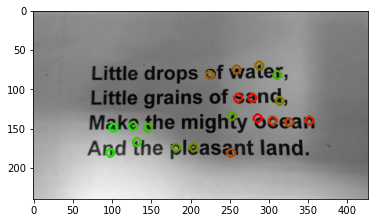

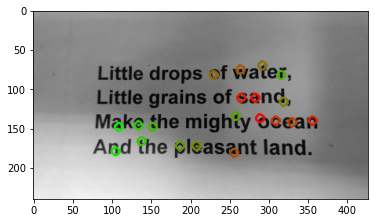

images 02.tif : 03.tif
xShift = -4.0 ; yShift = 0.95
totalXShift = 0.9000000000000004 ; totalYShift = 0.49999999999999994


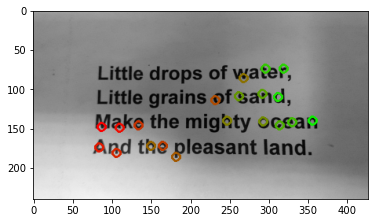

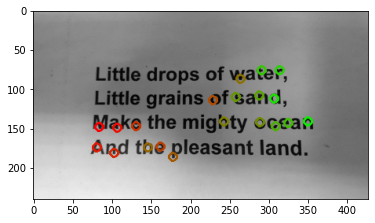

images 03.tif : 04.tif
xShift = 1.4210526315789473 ; yShift = -3.8947368421052633
totalXShift = 2.3210526315789477 ; totalYShift = -3.3947368421052633


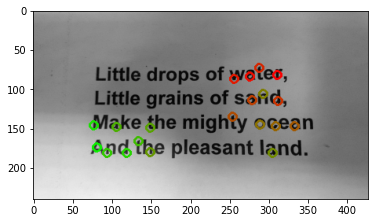

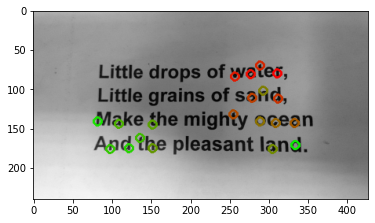

images 04.tif : 05.tif
xShift = 0.16666666666666666 ; yShift = -2.5555555555555554
totalXShift = 2.487719298245614 ; totalYShift = -5.950292397660819


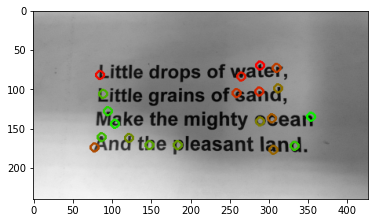

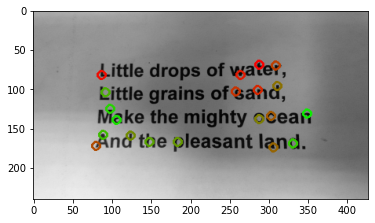

images 05.tif : 06.tif
xShift = -0.5 ; yShift = -0.7222222222222222
totalXShift = 1.9877192982456142 ; totalYShift = -6.672514619883041


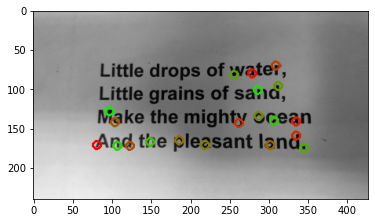

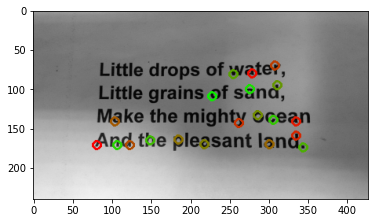

images 06.tif : 07.tif
xShift = -6.2631578947368425 ; yShift = 1.894736842105263
totalXShift = -4.275438596491228 ; totalYShift = -4.777777777777779


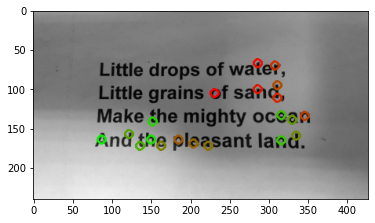

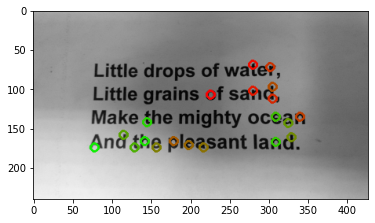

images 07.tif : 08.tif
xShift = -2.05 ; yShift = -2.05
totalXShift = -6.325438596491228 ; totalYShift = -6.827777777777778


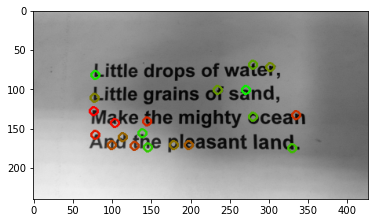

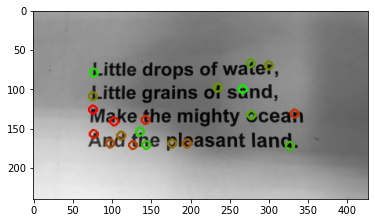

images 08.tif : 09.tif
xShift = 3.15 ; yShift = -6.4
totalXShift = -3.175438596491228 ; totalYShift = -13.227777777777778


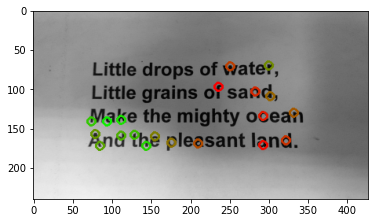

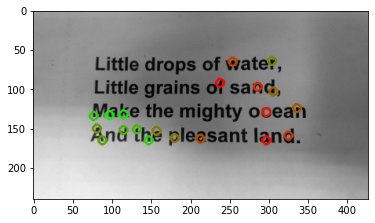

images 09.tif : 10.tif
xShift = 3.3 ; yShift = -8.15
totalXShift = 0.12456140350877165 ; totalYShift = -21.37777777777778


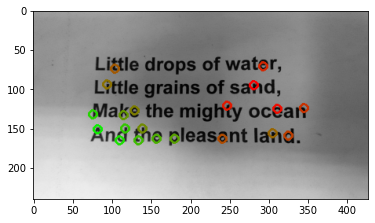

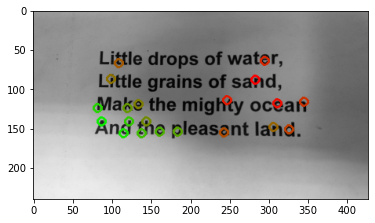

images 10.tif : 11.tif
xShift = 2.4210526315789473 ; yShift = -2.526315789473684
totalXShift = 2.545614035087719 ; totalYShift = -23.904093567251465


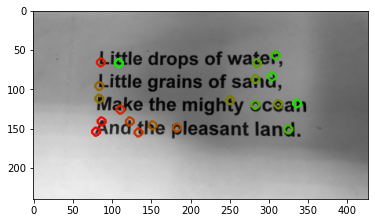

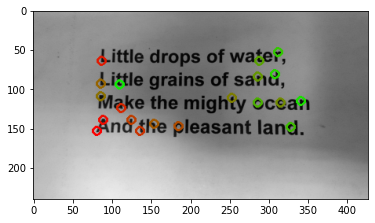

images 11.tif : 12.tif
xShift = 4.4 ; yShift = -2.85
totalXShift = 6.945614035087719 ; totalYShift = -26.754093567251466


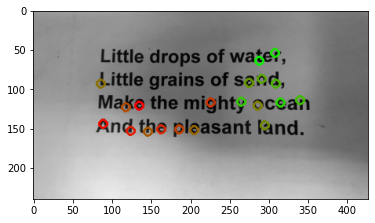

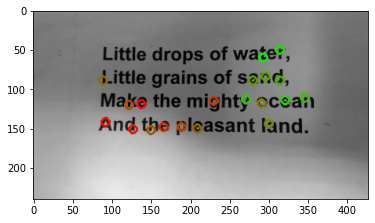

In [2]:
top20 = dict()
totalXShift = 0
totalYShift = 0

for i in range(len(imageNames) - 1):
    startTime = time.time()
    
    desc1 = descriptors[i][1].astype('int32')
    desc2 = descriptors[i + 1][1].astype('int32')
    sq1 = list()
    sq2 = list()
    for id1 in range(len(desc1)):
        sq1.append(np.dot(desc1[id1], desc1[id1]))
    for id2 in range(len(desc2)):
        sq2.append(np.dot(desc2[id2], desc2[id2]))
    
    distMap = dict()
    for id1 in range(len(desc1)):
        for id2 in range(len(desc2)):
            dot = np.dot(desc1[id1], desc2[id2])
            distMap[(id1, id2)] = (abs(dot - sq1[id1]) + abs(dot - sq2[id2]))
    sortedMap = dict(sorted(distMap.items(), key=lambda item: item[1]))
    
    top20.clear()
    for key in sortedMap.keys():
        isValid = True
        for topKey in top20.keys():
            point1 = keyPoints[i][key[0]].pt
            point2 = keyPoints[i][topKey[0]].pt
            r = ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5
            if(r < 15):
                isValid = False
            point1 = keyPoints[i + 1][key[1]].pt
            point2 = keyPoints[i + 1][topKey[1]].pt
            r = ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5
            if(r < 15):
                isValid = False
        if(isValid):
            point1 = keyPoints[i][key[0]].pt
            point2 = keyPoints[i + 1][key[1]].pt
            top20[key] = ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5
        if(len(top20) >= 20):
            break
    
    top20 = dict(sorted(top20.items(), key=lambda item: item[1]))
    Q1 = (list(top20.values())[4] + list(top20.values())[5]) / 2.
    Q3 = (list(top20.values())[14] + list(top20.values())[15]) / 2.
    X1 = Q1 - 1.5 * (Q3 - Q1)
    X2 = Q3 + 1.5 * (Q3 - Q1)
    
    image1 = cv2.imread(rootDir + imageNames[i], cv2.COLOR_BGR2GRAY)
    image2 = cv2.imread(rootDir + imageNames[i + 1], cv2.COLOR_BGR2GRAY)
    colorIterator = 0
    averageIterator = 0
    xShift = 0
    yShift = 0
    for key in top20.keys():
        point1 = np.array(keyPoints[i][key[0]].pt).astype('int32')
        point2 = np.array(keyPoints[i + 1][key[1]].pt).astype('int32')
        if(top20[key] < X2 and top20[key] > X1):
            xShift += point2[0] - point1[0]
            yShift += point2[1] - point1[1]
            averageIterator += 1
        
        cv2.circle(image1, tuple(point1), 5, (250 - 25 * colorIterator, 25 * colorIterator, 0), 2)
        cv2.circle(image2, tuple(point2), 5, (250 - 25 * colorIterator, 25 * colorIterator, 0), 2)
        colorIterator += 0.5
    
    xShift = xShift / averageIterator
    yShift = yShift / averageIterator
    totalXShift += xShift
    totalYShift += yShift
    print("images", imageNames[i], ":", imageNames[i + 1])
    #сдвиг в координатах изображения относительно предыдущего
    print("xShift =", xShift, "; yShift =", yShift)
    #сдвиг отнсиотельно первого кадра
    print("totalXShift =", totalXShift, "; totalYShift =", totalYShift)
    plt.imshow(image1)
    plt.show()
    plt.imshow(image2)
    plt.show()
    
    timePerFrame[i + 1] += time.time() - startTime
    

# Сложность алгоритма O(W*H) из-за вычисления особых точек

Time per frame


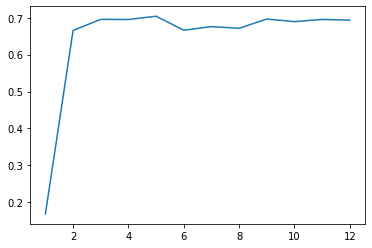

In [5]:
#для первого кадра не вычисляется 
print("Time per frame")
plt.plot(list(range(2, 13)), timePerFrame)
plt.show()